# Project: Sharktale, SharkTrack
## Data Cleaning

In [ ]:
!pip install xlrd #!pip install country_converter, keep this here pls

### Import of Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')

### Loading the Excel Data

In [380]:
#define path to xls
url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
df = pd.read_excel(url)
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-02-07 00:00:00,2025.0,Unprovoked,Turks and Caicos,NaN,Thompson Cove Beach,Swimming,Unknown,F,55,...,Unknown,Todd Smith: Platform X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-02-03 00:00:00,2025.0,Unprovoked,Australia,Queensland,"Woorim Beach, Bribie Island,",Swimming,Charlize Zmuda,F,17,...,Bull shark,9 News: The Brisbane Times: The Guardian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6990,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6991,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6992,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


### Data at a Glance 
Reviewing how the database is organised by using .head(), .info(), .describe(), .tail(), .columns. This will help me on how to pepare the data cleaning process.

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.columns

### Columns Cleaning and Renaming 

I have reviewed the columns and decided to do the following: 
- Remove extra " " and also replacing extra " " with "_". 
- Dropping the following columns: "Case_Number_1", "Unnamed_21". "Unnamed_22" . 
- Renaming:  'Fatal Y/N': 'Fatal', 'Sex': 'Gender',  'pdf': 'PDF',  and  'Species ': 'Species', 'href': 'Link','original order': 'Original_Order', 

In [381]:
df = df.rename(columns= {
    'Fatal Y/N': 'Fatal',
    'Species ': 'Species',
    'pdf': 'PDF', 
    'Sex': 'Gender',
    'href formula': 'Href_formula', 
    'href': 'Link',
    'Case Number': 'Case_Number', 
    'Case Number.1': 'Case_Number_1',
    'original order': 'Original_Order', 
    'Unnamed: 21': 'Unnamed_21', 
    'Unnamed: 22': 'Unnamed_22'
})
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Gender', 'Age', 'Injury', 'Fatal', 'Time', 'Species', 'Source',
       'PDF', 'Href_formula', 'Link', 'Case_Number', 'Case_Number_1',
       'Original_Order', 'Unnamed_21', 'Unnamed_22'],
      dtype='object')

In [382]:
df["Case_Number"].isin(df["Case_Number_1"]).value_counts() # There is less than 10% difference 

Case_Number
True     6945
False      49
Name: count, dtype: int64

In [383]:
# Dropping Columns
df = df.drop(columns=["Unnamed_21", "Unnamed_22", "PDF", "Href_formula", "Case_Number_1"])
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Gender', 'Age', 'Injury', 'Fatal', 'Time', 'Species', 'Source',
       'Link', 'Case_Number', 'Original_Order'],
      dtype='object')

In [384]:
### Cleaning and replacing all Nan's of Columns that are objects/strings
df["Country"] = df["Country"].fillna("Unknown").str.strip().astype(str)
df["State"] = df["State"].fillna("Unknown").str.strip().astype(str)
df["Location"] = df["Location"].fillna("Unknown").str.strip().astype(str)
df["Activity"] = df["Activity"].fillna("Unknown").str.strip().astype(str)
df["Name"] = df["Name"].fillna("Unknown").str.strip().astype(str)
df["Gender"] = df["Gender"].fillna("Unknown").str.strip().astype(str)
df["Injury"] = df["Injury"].fillna("Unknown").str.strip().astype(str)
df["Species"] = df["Species"].fillna("Unknown").str.strip().astype(str)
df["Fatal"] = df["Fatal"].fillna("Unknown").str.strip().astype(str)
df["Link"] = df["Link"].fillna("Unknown").str.strip().astype(str)
df["Source"] = df["Source"].fillna("Unknown").str.strip().astype(str)
df["Type"] = df["Type"].fillna("Unknown").str.strip().astype(str)
df["Name"] = df["Name"].fillna("Unknown").str.strip().astype(str)
#df["Age"] = df["Age"].fillna("Unknown").str.strip().astype(str)

In [ ]:
print(df.isna().sum())  # Check-up for all Nan's

### Cleaning Column 'Month'

In [385]:
def finding_month(date): 
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Oct", "Nov", "Dec"]
    #If it founds the info of a given month, it returns an output of this cleaning function
    try:
        for month in months: 
            if re.search(month, date):
                return month
    except TypeError:
        pass 
  
df["Month"] = df["Date"]
df["Month"] = df["Date"].apply(finding_month)
df["Month"].fillna(value="Unknown", inplace=True)
print(df["Month"].value_counts())  # Check unique values

Month
Unknown    1186
Jul         774
Aug         667
Jan         566
Jun         545
Oct         500
Apr         493
Dec         490
Mar         458
May         450
Nov         449
Feb         416
Name: count, dtype: int64


### Cleaning Column 'Date'

- Reviewing the column 'Date'. I am stripping the time component, because we already have a column with time.

In [386]:
df["Date"].unique()[:100]

array([datetime.datetime(2025, 2, 7, 0, 0),
       datetime.datetime(2025, 2, 3, 0, 0),
       datetime.datetime(2025, 1, 23, 0, 0),
       datetime.datetime(2025, 1, 22, 0, 0),
       datetime.datetime(2025, 1, 11, 0, 0),
       datetime.datetime(2025, 1, 2, 0, 0),
       datetime.datetime(2024, 12, 29, 0, 0),
       datetime.datetime(2024, 12, 28, 0, 0),
       datetime.datetime(2024, 12, 2, 0, 0),
       datetime.datetime(2024, 12, 1, 0, 0),
       datetime.datetime(2024, 11, 30, 0, 0),
       datetime.datetime(2024, 11, 19, 0, 0),
       datetime.datetime(2024, 11, 15, 0, 0),
       datetime.datetime(2024, 11, 1, 0, 0),
       datetime.datetime(2024, 10, 31, 0, 0),
       datetime.datetime(2024, 10, 25, 0, 0),
       datetime.datetime(2024, 10, 14, 0, 0),
       datetime.datetime(2024, 10, 11, 0, 0),
       datetime.datetime(2024, 9, 17, 0, 0),
       datetime.datetime(2024, 9, 16, 0, 0),
       datetime.datetime(2024, 8, 26, 0, 0),
       datetime.datetime(2024, 8, 6, 0, 0),
     

In [387]:
print(df["Date"].dtype)

object


In [388]:
# To ensure all values are strings before applying the function 
df["Date"] = df["Date"].astype(str).str.lower().str.strip() # Converting everything to lowercase, and removing extra spaces before and after text. 

In [389]:
def extract_date(text):
    """
    Extracts valid date-like information from messy strings.
    Converts multiple formats into a standard date format (DD-MM-YYYY).
    """
    if not isinstance(text, str) or text.lower().strip() in ["none", "nan", "null", ""]:
        return None  # Handle missing values

    text = text.strip()  # Remove leading/trailing spaces

    # Define regex patterns to capture different date formats
    date_patterns = [
        r"\d{4}-\d{2}-\d{2}",             # "2023-05-20" (ISO format)
        r"\d{1,2}-[a-z]{3}-\d{4}",        # "18-may-2023"
        r"\d{1,2} [a-z]{3}-\d{4}",        # "09 may-2023"
        r"\d{1,2} [a-z]{3} \d{4}",        # "15 Mar 2024"
        r"\d{1,2}-[A-Za-z]{3}-\d{4}",     # "23-Jun-2023"
        r"\d{1,2} [A-Za-z]{3} \d{4}",     # "15 Mar 2024"
        r"\d{1,2} [A-Za-z]+ \d{4}",       # "15 March 2024"
        r"\d{1,2}(st|nd|rd|th)? of [A-Za-z]+, \d{4}"  # "24th of May, 2022"
    ]

    for pattern in date_patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            return match.group(0)  # Extract the matched date part

    return None  # Return None if no valid date is found

 # Clean the "Date" column before applying regex
df["Date"] = df["Date"].astype(str).str.strip()

# Apply extraction function
df["Cleaned_Date"] = df["Date"].apply(extract_date)

# Convert extracted dates into proper datetime format
df["Cleaned_Date"] = pd.to_datetime(df["Cleaned_Date"], errors="coerce")

# Convert to DD-MM-YYYY format (Final Step)
df["Cleaned_Date"] = df["Cleaned_Date"].dt.strftime('%d-%m-%Y')

In [390]:
# Count missing values (NaN)
null_count = df["Cleaned_Date"].isna().sum()
print(f"Number of null values: {null_count}")

Number of null values: 6945


In [391]:
# Show only rows where Cleaned_Date is NaN
missing_rows = df[df["Cleaned_Date"].isna()]
missing_rows

,Date,Year,Type,Country,State,Location,Activity,Name,Gender,Age,Injury,Fatal,Time,Species,Source,Link,Case_Number,Original_Order,Month,Cleaned_Date
48,15 mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",N,16h00,Tiger shark,"Yahoo News, 3/15/2024",Unknown,NaN,NaN,Mar,NaN
49,04 mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",N,NaN,Tiger shark 8',"Surfer, 3/6/2024F",Unknown,NaN,NaN,Mar,NaN
50,02 mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,Not stated,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",Unknown,NaN,NaN,Mar,NaN
51,25 feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",Swimming,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024",Unknown,NaN,NaN,Feb,NaN
52,14 feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024",Unknown,NaN,NaN,Feb,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989,before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,Unknown,"H. Taunton; N. Bartlett, p. 234",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,6.0,Unknown,NaN
6990,before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Unknown,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,Unknown,"H. Taunton; N. Bartlett, pp. 233-234",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,5.0,Unknown,NaN
6991,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,Unknown,"F. Schwartz, p.23; C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,4.0,Unknown,NaN
6992,1883-1889,0.0,Unprovoked,PANAMA,Unknown,"Panama Bay 8ºN, 79ºW",Unknown,Jules Patterson,M,NaN,FATAL,Y,NaN,Unknown,"The Sun, 10/20/1938",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,3.0,Unknown,NaN


In [392]:
display(df)

,Date,Year,Type,Country,State,Location,Activity,Name,Gender,Age,Injury,Fatal,Time,Species,Source,Link,Case_Number,Original_Order,Month,Cleaned_Date
0,2025-02-07 00:00:00,2025.0,Unprovoked,Turks and Caicos,Unknown,Thompson Cove Beach,Swimming,Unknown,F,55,Unknown,N,Unknown,Unknown,Todd Smith: Platform X,Unknown,NaN,NaN,Unknown,07-02-2025
1,2025-02-03 00:00:00,2025.0,Unprovoked,Australia,Queensland,"Woorim Beach, Bribie Island,",Swimming,Charlize Zmuda,F,17,Bites to arm and upper body,Y,1645 hrs,Bull shark,9 News: The Brisbane Times: The Guardian,Unknown,NaN,NaN,Unknown,03-02-2025
2,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,Minor bite to lower body,N,1711hrs,Not stated,Bob Myatt GSAF,Unknown,NaN,NaN,Unknown,23-01-2025
3,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,None - chunk of surfboard bitten out,N,1600hrs,Bronze whaler,Bob Myatt GSAF,Unknown,NaN,NaN,Unknown,22-01-2025
4,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com,Unknown,NaN,NaN,Unknown,11-01-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989,before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,Unknown,"H. Taunton; N. Bartlett, p. 234",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,6.0,Unknown,NaN
6990,before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Unknown,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,Unknown,"H. Taunton; N. Bartlett, pp. 233-234",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,5.0,Unknown,NaN
6991,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,Unknown,"F. Schwartz, p.23; C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,4.0,Unknown,NaN
6992,1883-1889,0.0,Unprovoked,PANAMA,Unknown,"Panama Bay 8ºN, 79ºW",Unknown,Jules Patterson,M,NaN,FATAL,Y,NaN,Unknown,"The Sun, 10/20/1938",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,3.0,Unknown,NaN


<Axes: xlabel='Year'>

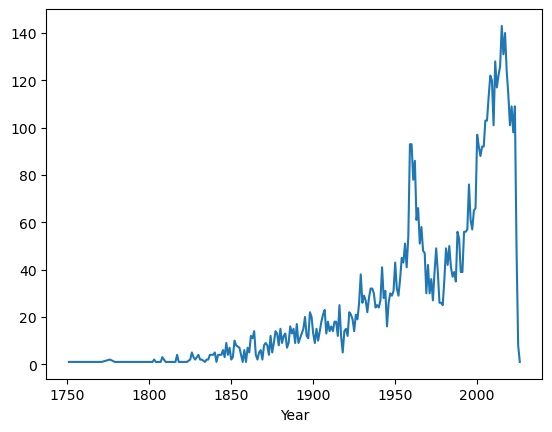

In [393]:
df_count = df.groupby("Year")["Date"].count()
df_count[df_count.index > 1750].plot()

In [ ]:
#Converting Datetime to Date format 

### Data Cleaning for the Column 'Type' 

In [ ]:
df.Type.unique() 

In [394]:
print(df["Type"].value_counts()) 

Type
Unprovoked             5155
Provoked                639
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Unknown                  18
Boat                      7
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64


In [395]:
print(df["Type"].value_counts(dropna=False)) # I wanted to review the Nan 

Type
Unprovoked             5155
Provoked                639
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Unknown                  18
Boat                      7
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64


In [396]:
#Reviewing how many were provoked and unprovoked 
print(df["Type"].unique())

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Sea Disaster'
 'Unknown' '?' 'Unconfirmed' 'Unverified' 'Invalid' 'Under investigation'
 'Boat']


In [398]:
df["Type"] = df["Type"].str.strip()
df["Type"] = df["Type"].replace({
    " Provoked": "Provoked", 
    "Unconfirmed": "Unknown",
    "?" : "Unknown",
    "Invalid": "Unknown",
    "Under investigation": "Unknown",
    "Questionable": "Unknown", 
    "Watercraft" : "Water Vehicle", 
    "Boat" : "Water Vehicle"
})

df["Type"] = df["Type"].fillna("Unknown")
print(df["Type"].unique())

['Unprovoked' 'Provoked' 'Unknown' 'Water Vehicle' 'Sea Disaster'
 'Unverified']


### Data Cleaning for the Column 'Gender'

In [399]:
df["Gender"] = df["Gender"].replace({
    " M": "M", 
    "M ": "M", 
    "M x 2": "M", 
    " nan": "Unknown", 
    "lli": "Unknown", 
    "N": "M", 
    ".": "Unknown"
    })
df["Gender"] = df["Gender"].fillna("Unknown")
df.Gender.unique()

array(['F', 'M', 'Unknown'], dtype=object)

### Data Cleaning for the Column 'Species'

In [400]:
df["Species"].unique()
print(df["Species"].unique()[:600])

['Unknown' 'Bull shark' 'Not stated' 'Bronze whaler'
 'Reportedly Tiger or Bull shark' 'Great White Shart estimated 4.8m 16 ft'
 'Reportedly a Tiger Shark' '1m shark species unknown' 'Great White Shark'
 'Reported as a large Tiger shark' 'Bull or tiger 7-8ft' 'Bull shark 6ft'
 'Bull shark 6-7ft' 'Reportedly a Great White' 'Reportedly Tiger Shark'
 'Reef shark 6ft (1.8m)' '3m White Shark' 'Undetermined small shall shark'
 '4-5ft Blacktip shark' 'Not specified' 'Bull shark 6 ft' '6 ft shark'
 '6ft shark' 'Not stated area has Tiger and Galapogas sharks'
 'Not specified Bull shark highly suspect' 'Large shark' '2.5m shark'
 '3m Sandbar shark' 'Bull shark 3m' 'Carribean reef shark 7ft'
 'Great White' 'Tiger shark' "Tiger shark 8'" "3' to 4' shark"
 "Bull shark, 7'" 'Blacktip reef shark' 'White shark' 'Raggedtooth shark'
 "White shark, 13'" 'Broze whaler?' 'Sevengill shark'
 'Shark involment not confirmed' '1.8m bull shark' 'Lemon shark'
 'Oceanic whitetip shark' 'White Shark, 4.5 m' "8' tig

In [401]:
# Cleaning the Column 'Species' a bit 
df["Species"] = df["Species"].str.extract(r'([A-Za-z\s-]+)').fillna("Unknown") # Cleaning here the unnecessary details
df["Species"] = df["Species"].replace({
    "Not stated":"Unknown"
})
print(df["Species"])

0             Unknown
1          Bull shark
2             Unknown
3       Bronze whaler
4             Unknown
            ...      
6989          Unknown
6990          Unknown
6991          Unknown
6992          Unknown
6993          Unknown
Name: Species, Length: 6994, dtype: object


In [402]:
df["Species_Types"] = df["Species"].copy() # creating a copy of species and naming it Species_Types

In [436]:
df["Species_Types"] = df["Species_Types"].astype(str).str.strip()

In [437]:
df["Species_Types"] = df["Species_Types"].fillna("Unknown").astype(str)

In [438]:
df["Species_Types"] = df["Species_Types"].replace({
    "Not stated": "Unknown",
    "Not specified": "Unknown",
    "Invalid": "Unknown",
    "Great White Shark": "White Shark"   
}) 

In [ ]:
def clean_shark_name(species): 
    species = species.strip().lower()

    match = re.search(r"(?:\b\w+\s+)*?(great white|spinner|leopard|whitetip|sandtiger|lemon|horn|white|tiger|broadnos|bull|Bull|hammerhead|hammer|grey|Grey|Hammerhead|blacktip|Blacktip|whale|nurse|mako|reef|Reef)(?:\s+\w+)*?\s*shark(?:\s+\w+)*?", species)

    if match:
        #return match.group(0).title()
        return match.group(1).title() + " Shark"
    else: 
        return "Other/Unknown"

df["Species_Types"] = df["Species_Types"].apply(clean_shark_name)

print(df["Species_Types"].value_counts())  # Check unique values
print(df["Species_Types"].tail())  # Display first few rows

Species_Types
Other/Unknown       5567
White Shark          552
Tiger Shark          314
Bull Shark           197
Nurse Shark          110
Blacktip Shark       101
Reef Shark            57
Mako Shark            56
Hammerhead Shark      37
Whale Shark            3
Name: count, dtype: int64
6989    Other/Unknown
6990    Other/Unknown
6991    Other/Unknown
6992    Other/Unknown
6993    Other/Unknown
Name: Species_Types, dtype: object


In [455]:
df["Species_Types"].unique()

array(['Other/Unknown', 'Bull Shark', 'Tiger Shark', 'White Shark',
       'Reef Shark', 'Blacktip Shark', 'Nurse Shark', 'Mako Shark',
       'Hammerhead Shark', 'Whale Shark'], dtype=object)

In [441]:
#df["Location"] = df["Location"].astype(str).str.strip()
print(df["Species_Types"].value_counts())

Species_Types
Other/Unknown       5567
White Shark          552
Tiger Shark          314
Bull Shark           197
Nurse Shark          110
Blacktip Shark       101
Reef Shark            57
Mako Shark            56
Hammerhead Shark      37
Whale Shark            3
Name: count, dtype: int64


### Data Cleaning for the Column 'Fatal'

In [407]:
df["Fatal"].unique()

array(['N', 'Y', 'F', 'M', 'Unknown', 'n', 'Nq', 'UNKNOWN', 'nan',
       'Y x 2', 'y'], dtype=object)

In [411]:
df["Fatal"] = df["Fatal"].fillna("Unknown").str.strip().astype(str)

In [457]:
# Data Cleaning for The Column Fatal
df["Fatal"] = df["Fatal"].fillna("Unknown")
df["Fatal"] = df["Fatal"].str.strip()
df["Fatal"].value_counts(dropna=False)
df["Fatal"] = df["Fatal"].astype(str)
df["Fatal"] = df["Fatal"].replace({
    "Nan": "Unknown",
    " N": "NO",
    "UNKNOWN": "Unknown",
    "F": "Unknown",\
    "M": "NO",
    "n": "NO",
    "N": "NO",
    "Nq": "NO",
    "Y": "YES",
    2017: "Unknown",
    "2017 ": "Unknown",
     "Y x 2": "Yes",
     "y": "Yes",
     "N   ": "NO",
     "nan": "Unknown"
})
df["Fatal"].unique()

array(['NO', 'YES', 'Unknown', 'Yes'], dtype=object)

In [458]:
print(df["Species_Types"].value_counts())

Species_Types
Other/Unknown       5567
White Shark          552
Tiger Shark          314
Bull Shark           197
Nurse Shark          110
Blacktip Shark       101
Reef Shark            57
Mako Shark            56
Hammerhead Shark      37
Whale Shark            3
Name: count, dtype: int64


### Data Cleaning for the Column 'Country'

In [414]:
df["Country"].unique()

array(['Turks and Caicos', 'Australia', 'USA', 'New Caledonia', 'Egypt',
       'Thailand', 'New Zealand', 'Maldives', 'Hawaii', 'Honduras',
       'Morocco', 'Jamaica', 'Belize', 'Maldive Islands',
       'French Polynesia', 'Tobago', 'Bahamas', 'AUSTRALIA', 'INDIA',
       'TRINIDAD', 'BAHAMAS', 'SOUTH AFRICA', 'MEXICO', 'NEW ZEALAND',
       'EGYPT', 'Mexico', 'BELIZE', 'PHILIPPINES', 'Coral Sea', 'SPAIN',
       'PORTUGAL', 'SAMOA', 'COLOMBIA', 'ECUADOR', 'FRENCH POLYNESIA',
       'NEW CALEDONIA', 'TURKS and CaICOS', 'CUBA', 'BRAZIL',
       'SEYCHELLES', 'ARGENTINA', 'FIJI', 'MeXICO', 'South Africa',
       'ENGLAND', 'JAPAN', 'INDONESIA', 'JAMAICA', 'MALDIVES', 'THAILAND',
       'COLUMBIA', 'COSTA RICA', 'British Overseas Territory', 'CANADA',
       'JORDAN', 'ST KITTS / NEVIS', 'ST MARTIN', 'PAPUA NEW GUINEA',
       'REUNION ISLAND', 'ISRAEL', 'CHINA', 'IRELAND', 'ITALY',
       'MALAYSIA', 'LIBYA', 'Unknown', 'MAURITIUS', 'SOLOMON ISLANDS',
       'ST HELENA, British overse

In [415]:
len(df["Country"].unique())

232

In [416]:
update_country = {
    'AUSTRALIA': 'Australia',
    'BAHAMAS': 'Bahamas',
    'BELIZE': 'Belize',
    'COLOMBIA': 'Colombia',
    'COLUMBIA': 'Colombia',
    'EGYPT': 'Egypt',
    'ENGLAND': 'United Kingdom',
    'FRENCH POLYNESIA': 'French Polynesia',
    'INDIA': 'India',
    'INDONESIA': 'Indonesia',
    'JAMAICA': 'Jamaica',
    'JAPAN': 'Japan',
    'MALDIVE ISLANDS': 'Maldives',
    'MALDIVES': 'Maldives',
    'MEXICO': 'Mexico',
    'MeXICO': 'Mexico',
    'MEXICO ': 'Mexico',
    'NEW CALEDONIA': 'New Caledonia',
    'NEW ZEALAND': 'New Zealand',
    'PHILIPPINES': 'Philippines',
    'SPAIN': 'Spain',
    'SOUTH AFRICA': 'South Africa',
    'South Africa': 'South Africa',
    'THAILAND': 'Thailand',
    'TRINIDAD': 'Trinidad and Tobago',
    'TRINIDAD & TOBAGO': 'Trinidad and Tobago',
    'TURKS & CAICOS': 'Turks and Caicos',
    'TURKS and CaICOS': 'Turks and Caicos',
    'UNITED ARAB EMIRATES (UAE)': 'United Arab Emirates',
    'UNITED KINGDOM': 'United Kingdom',
    'USA': 'United States',
    'UAE': 'United Arab Emirates',
    'UNITED STATES': 'United States',
    'REUNION ISLAND': 'Reunion',
    'REUNION': 'Reunion',
    'ST MARTIN': 'Saint Martin',
    'ST. MARTIN': 'Saint Martin',
    'ST. MAARTIN': 'Saint Martin',
    'SAINT MAARTEN': 'Saint Martin',
    'PAPUA NEW GUINEA': 'Papua New Guinea',
    'FIJI': 'Fiji',
    'Fiji': 'Fiji',
    'CANADA': 'Canada',
    'CUBA': 'Cuba',
    'ARGENTINA': 'Argentina',
    'BRAZIL': 'Brazil',
    'CHILE': 'Chile',
    'ECUADOR': 'Ecuador',
    'PERU': 'Peru',
    'VENEZUELA': 'Venezuela',
    'COOK ISLANDS': 'Cook Islands',
    'DOMINICAN REPUBLIC': 'Dominican Republic',
    'SEYCHELLES': 'Seychelles',
    'ST KITTS / NEVIS': 'Saint Kitts and Nevis',
    'ST HELENA, British overseas territory': 'Saint Helena',
    'SOLOMON ISLANDS': 'Solomon Islands',
    'TONGA': 'Tonga',
    ' TONGA': 'Tonga',
    'KIRIBATI': 'Kiribati',
    'PALAU': 'Palau',
    'MALTA': 'Malta',
    'SCOTLAND': 'United Kingdom',
    'IRELAND': 'Ireland',
    'ITALY': 'Italy',
    'MALAYSIA': 'Malaysia',
    'LIBYA': 'Libya',
    'JORDAN': 'Jordan',
    'ISRAEL': 'Israel',
    'CHINA': 'China',
    'TAIWAN': 'Taiwan',
    'INDIAN OCEAN': 'Indian Ocean',
    'INDIAN OCEAN?': 'Indian Ocean',
    'INDIAN OCEAN?': 'Indian Ocean',
    'NORTH ATLANTIC OCEAN': 'North Atlantic Ocean',
    'NORTH ATLANTIC OCEAN ': 'North Atlantic Ocean',
    'SOUTH ATLANTIC OCEAN': 'South Atlantic Ocean',
    'ATLANTIC OCEAN': 'Atlantic Ocean',
    'PACIFIC OCEAN': 'Pacific Ocean',
    'PACIFIC OCEAN ': 'Pacific Ocean',
    'SOUTH PACIFIC OCEAN': 'South Pacific Ocean',
    'NORTH PACIFIC OCEAN': 'North Pacific Ocean',
    'CARIBBEAN SEA': 'Caribbean Sea',
    'MID ATLANTIC OCEAN': 'Mid Atlantic Ocean',
    'SOUTH CHINA SEA': 'South China Sea',
    'BAY OF BENGAL': 'Bay of Bengal',
    'RED SEA': 'Red Sea',
    'RED SEA?': 'Red Sea',
    'RED SEA / INDIAN OCEAN': 'Red Sea',
    'GULF OF ADEN': 'Gulf of Aden',
    'PERSIAN GULF': 'Persian Gulf',
    'CEYLON': 'Sri Lanka',
    'CEYLON (SRI LANKA)': 'Sri Lanka',
    'SRI LANKA': 'Sri Lanka',
    'BANGLADESH': 'Bangladesh',
    'BURMA': 'Myanmar',
    'MYANMAR': 'Myanmar',
    'VIETNAM': 'Vietnam',
    'HONG KONG': 'Hong Kong',
    'MARTINIQUE': 'Martinique',
    'NETHERLANDS ANTILLES': 'Netherlands Antilles',
    'NORTHERN MARIANA ISLANDS': 'Northern Mariana Islands',
    'FEDERATED STATES OF MICRONESIA': 'Micronesia',
    'MICRONESIA': 'Micronesia',
    'FALKLAND ISLANDS': 'Falkland Islands',
    'GIBRALTAR': 'Gibraltar',
    'SAUDI ARABIA': 'Saudi Arabia',
    'SINGAPORE': 'Singapore',
    'SENEGAL': 'Senegal',
    'SOMALIA': 'Somalia',
    'SOUTH KOREA': 'South Korea',
    'NORTH KOREA': 'North Korea',
    'RUSSIA': 'Russia',
    'GREECE': 'Greece',
    'TUNISIA': 'Tunisia',
    'TURKEY': 'Turkey',
    'IRAN': 'Iran',
    'IRAQ': 'Iraq',
    'KUWAIT': 'Kuwait',
    'LEBANON': 'Lebanon',
    'SYRIA': 'Syria',
    'AFRICA': 'Africa',
    'Coast of AFRICA': 'Africa',
    'GEORGIA': 'Georgia',
    'GHANA': 'Ghana',
    'GUINEA': 'Guinea',
    'NAMIBIA': 'Namibia',
    'TANZANIA': 'Tanzania',
    'ALGERIA': 'Algeria',
    'DJIBOUTI': 'Djibouti',
    'EQUATORIAL GUINEA / CAMEROON': 'Equatorial Guinea',
    'WEST INDIES': 'Caribbean',
    'BRITISH ISLES': 'United Kingdom',
    'BRITISH WEST INDIES': 'Caribbean',
    'ST HELENA, British overseas territory': 'Saint Helena',
    'NORWAY': 'Norway',
    'ICELAND': 'Iceland',
    'GABON': 'Gabon',
    'MAYOTTE': 'Mayotte',
    'SWEDEN': 'Sweden',
    'SLOVENIA': 'Slovenia',
    'CURACAO': 'Curaçao',
    'HAITI': 'Haiti',
    'GUATEMALA': 'Guatemala',
    'NICARAGUA': 'Nicaragua',
    'NICARAGUA ': 'Nicaragua',
    'HONDURAS': 'Honduras',
    'EL SALVADOR': 'El Salvador',
    'COSTA RICA': 'Costa Rica',
    'PANAMA': 'Panama',
    'BARBADOS': 'Barbados',
    'ARUBA': 'Aruba',
    'GRAND CAYMAN': 'Cayman Islands',
    'CAYMAN ISLANDS': 'Cayman Islands',
    'SAINT LUCIA': 'Saint Lucia',
    'USA': 'United States', 
    'Usa': 'United States'
}

In [417]:
df['Country'] = df['Country'].replace(update_country).fillna('Unknown')

In [418]:
df['Country'].unique()

array(['Turks and Caicos', 'Australia', 'United States', 'New Caledonia',
       'Egypt', 'Thailand', 'New Zealand', 'Maldives', 'Hawaii',
       'Honduras', 'Morocco', 'Jamaica', 'Belize', 'Maldive Islands',
       'French Polynesia', 'Tobago', 'Bahamas', 'India',
       'Trinidad and Tobago', 'South Africa', 'Mexico', 'Philippines',
       'Coral Sea', 'Spain', 'PORTUGAL', 'SAMOA', 'Colombia', 'Ecuador',
       'Cuba', 'Brazil', 'Seychelles', 'Argentina', 'Fiji',
       'United Kingdom', 'Japan', 'Indonesia', 'Costa Rica',
       'British Overseas Territory', 'Canada', 'Jordan',
       'Saint Kitts and Nevis', 'Saint Martin', 'Papua New Guinea',
       'Reunion', 'Israel', 'China', 'Ireland', 'Italy', 'Malaysia',
       'Libya', 'Unknown', 'MAURITIUS', 'Solomon Islands', 'Saint Helena',
       'COMOROS', 'UNITED ARAB EMIRATES', 'CAPE VERDE',
       'Dominican Republic', 'Cayman Islands', 'Aruba', 'MOZAMBIQUE',
       'PUERTO RICO', 'Atlantic Ocean', 'Greece', 'FRANCE', 'Kiribati',
  

In [ ]:
 #Data Cleaning for the column 'Country', I've tried to use regex 
df["Country"] = df["Country"].str.strip().str.title()
df["Country"] = df["Country"].str.replace(r"[^a-zA-Z\s]", "", regex=True)
#df["Country"] = df["Country"].map(lambda x: x.upper())
df["Country"] = df["Country"].fillna("Unknown")
print(df["Country"].unique())

['Turks And Caicos' 'Australia' 'United States' 'New Caledonia' 'Egypt'
 'Thailand' 'New Zealand' 'Maldives' 'Hawaii' 'Honduras' 'Morocco'
 'Jamaica' 'Belize' 'Maldive Islands' 'French Polynesia' 'Tobago'
 'Bahamas' 'India' 'Trinidad And Tobago' 'South Africa' 'Mexico'
 'Philippines' 'Coral Sea' 'Spain' 'Portugal' 'Samoa' 'Colombia' 'Ecuador'
 'Cuba' 'Brazil' 'Seychelles' 'Argentina' 'Fiji' 'United Kingdom' 'Japan'
 'Indonesia' 'Costa Rica' 'British Overseas Territory' 'Canada' 'Jordan'
 'Saint Kitts And Nevis' 'Saint Martin' 'Papua New Guinea' 'Reunion'
 'Israel' 'China' 'Ireland' 'Italy' 'Malaysia' 'Libya' 'Unknown'
 'Mauritius' 'Solomon Islands' 'Saint Helena' 'Comoros'
 'United Arab Emirates' 'Cape Verde' 'Dominican Republic' 'Cayman Islands'
 'Aruba' 'Mozambique' 'Puerto Rico' 'Atlantic Ocean' 'Greece' 'France'
 'Kiribati' 'Diego Garcia' 'Taiwan' 'Palestinian Territories' 'Guam'
 'Nigeria' 'Tonga' 'Croatia' 'Saudi Arabia' 'Chile' 'Antigua' 'Kenya'
 'Russia' 'Azores' 'South Korea' 

In [420]:
unique_country = len(df['Country'].unique())
unique_country

192

In [421]:
df["Country"] = df["Country"].replace(update_country) # Reassigning it back to "Country"

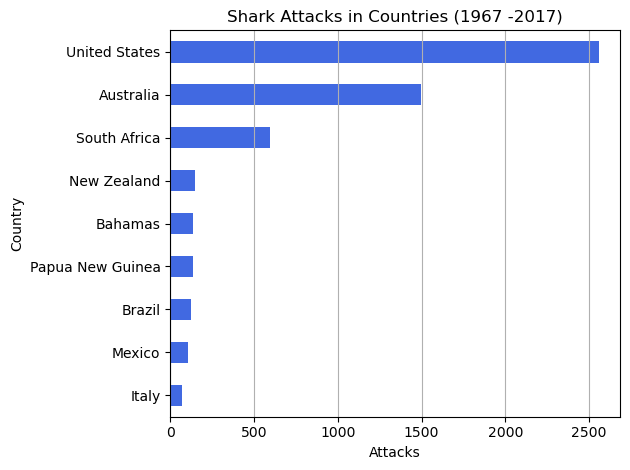

In [473]:
# Top 10 Country
top_10_attacks_country = df["Country"].value_counts().nlargest(9)

# Graphic Attacks by State 
top_10_attacks_country.sort_values(ascending=True, inplace=True)
top_10_attacks_country.plot.barh(color="royalblue")

plt.title("Shark Attacks in Countries (1967 -2017)")
plt.xlabel("Attacks")
plt.grid(axis="x")
plt.tight_layout()
plt.savefig("AttacksByCountry.png") # Saving as an image 

### Data Cleaning for the Column 'States'

In [474]:
# A filter specifically for USA 
filter_usa = (df["Country"] == "United States")
usa_df = df.loc[filter_usa]

In [475]:
# Top Shark Attacks by State
top_attacks_usa = df["State"].value_counts()
top_attacks_usa

State
Florida                   1186
New South Wales            523
Unknown                    483
Queensland                 352
Hawaii                     344
                          ... 
West Africa                  1
Wakaya Island                1
Mexico / Caribbean Sea       1
Antarctic Ocean              1
Moala Island                 1
Name: count, Length: 893, dtype: int64

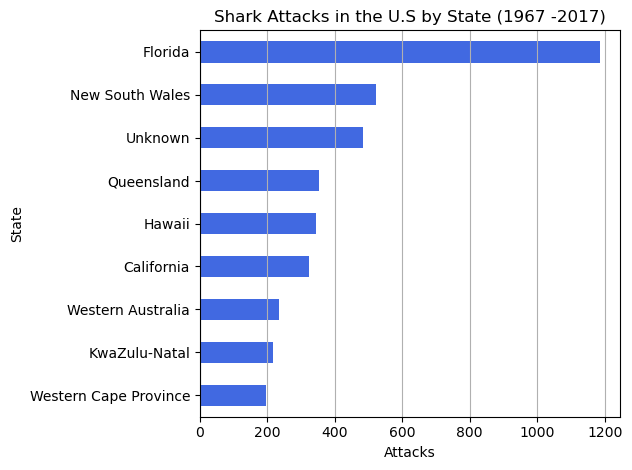

In [423]:
# Top 10 Shark Attacks by State
top_10_attacks_usa = df["State"].value_counts().nlargest(9)

# Graphic Attacks by State 
top_10_attacks_usa.sort_values(ascending=True, inplace=True)
top_10_attacks_usa.plot.barh(color="royalblue")

plt.title("Shark Attacks in the U.S by State (1967 -2017)")
plt.xlabel("Attacks")
plt.grid(axis="x")
plt.tight_layout()
plt.savefig("AttacksByState.png") # Saving as an image 

### Data Cleaning for the Column 'Age'

In [424]:
df["Age"].unique()

array([55, 17, 12, 37, 23, 40, 28, 69, 48, '60+', '?', 57, 24, 45, 61, 27,
       38, 16, 33, 30, 15, 41, 14, 26, 'Middle age', 18, 21, 49, 25, 46,
       19, 20, 65, 64, '13', nan, '11', '46', '32', '29', '10', '64',
       '62', '39', '22', '15', '16', '21', '66', '52', '20', '44', '26',
       '47', '55', '30', '59', '8', '50', '45', '34', '38', '30s', '37',
       '9', '19', '20/30', '35', '65', '20s', '77', '60', '49', '42',
       '!2', '24', '73', '25', '18', '50s', '58', '67', '17', '14', '6',
       '41', '53', '68', '43', '40', '51', '31', 39, 58, 51, 10, 13, 60,
       '40s', 68, 35, 62, 'teen', 8, 22, 32, 56, 'Teen', 42, 36, 50, 'M',
       9, 11, 34, '!6', 31, '!!', 47, 7, 71, 59, 53, 54, 75, '45 and 15',
       73, 52, 29, 70, 4, 63, 44, '28 & 22', '22, 57, 31', '60s', "20's",
       43, 67, 74, '9 & 60', 'a minor', 6, 3, 82, 66, 72, '23', '12',
       '36', '63', '71', '48', '70', '18 months', '57', '7', '28', '33',
       '61', '74', '27', '3', '56', '28 & 26', '5', '54

In [461]:
df["Age"] = df["Age"].str.strip()
print(df["Age"].value_counts())

Age
17          85
15          84
20          75
18          74
21          70
            ..
33 or 37     1
21 & ?       1
6½           1
30 or 36     1
13 or 14     1
Name: count, Length: 160, dtype: int64


Text(0.5, 1.0, 'Age Distribution')

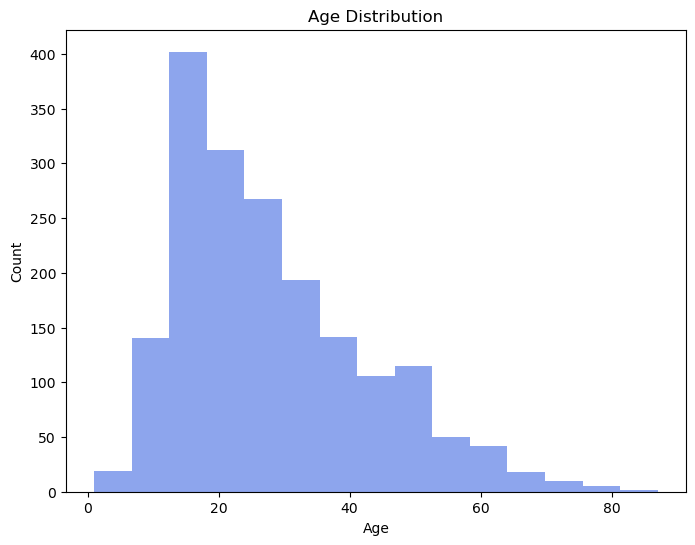

In [476]:
def age_process(age):
    try:
        age = int(age)
    except:
        age = 0
    if (age > 0 and age <= 100):
        return age
    else:
        return np.nan
df['Age'].fillna(0,inplace=True)
df['Age'] = df['Age'].apply(age_process)
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(df['Age'].dropna().astype(np.int32),
             ax=ax,
             hist_kws={"alpha": 0.6, "color": "royalblue"},
             kde=False,bins=15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

### Data Cleaning for the Column 'Location'

In [477]:
df["Location"] = df["Location"].astype(str).str.strip()
df["Location"] = df["Location"].map(lambda x:x.upper())
df["Location"] = df["Location"].fillna("Unknown")
#df["Location"] = df["Location"]
df["Location"] = df["Location"].replace({ "NAN": "Unknown", "nan": "Unknown","Nan": "Unknown"})

In [478]:
df["Location"].unique()[:100]

array(['THOMPSON COVE BEACH', 'WOORIM BEACH, BRIBIE ISLAND,',
       'SHIPWRECK COVE', 'CHEYNES BEACH', 'OFF HALEIWA BOAT HARBOUR OAHU',
       'ISLET OF KENDEK NEAR KOUMAC',
       'GRANITES BEACH NEAR WESTALL STREAKY BAY', 'RED SEA',
       'HUMPY ISLAND GREAT KEPPEL ISLAND',
       'CURTIS ISLAND NEAR GLADSTONE QLD CENTRAL COAST',
       'GREENOUGH RIVER MOUTH BEACH CAPE BURNEY 12KM SOUTH OF GERALDTON',
       'KHAO LAK BEACH', 'CHATHAM ISLANDS', 'MAAFUSHI',
       'SAND PILES WAIEHU BEACH PARK', 'WHITSUNDAY ISLANDS',
       'BATHTUB BEACH, MARTIN COUNTY', 'ATLANTIDA',
       'BREVARD COUNTY ORLANDO', 'PUERTO CASTILLO', 'WEST OF DAKHLA',
       'FALMOUTH', 'CENTRAL AMERICA', 'NORTH SHORE BEACH, PORT MACQUARIE',
       'TRIGG BEACH STERLING', 'PONCE DE LEON INLET VOLUSIA COUNTY',
       'NEW SMYRNA BEACH', 'SOUTH PADRE ISLAND',
       'NEW SMYRNA BEACH BEACH ACCESS 14 VOLUSIA COUNTY',
       "GOAT ISLAND (MOKU'AUIA) LA'IE BAY", 'HALEIWA, OAHU',
       'ROSEMARY BEACH WALTON COUNTY', 

In [430]:
df["Location"] = df["Location"].str.strip().str.lower().str.capitalize()
df["Location"]

0                       Thompson cove beach
1              Woorim beach, bribie island,
2                            Shipwreck cove
3                             Cheynes beach
4             Off haleiwa boat harbour oahu
                       ...                 
6989                            Roebuck bay
6990                                Unknown
6991                         Ocracoke inlet
6992                   Panama bay 8ºn, 79ºw
6993    Below the english fort, trincomalee
Name: Location, Length: 6994, dtype: object